k-means : 사전에 정한 k개의 클러스터로 데이터 분류
1. k개의 centroid를 임의로 선정
2. 모든 데이터를 가장 가까운 centroid에 할당
3. 각 클러스터에 속한 데이터의 평균으로 centroid 이동
4. max_iter에 다다르거나 클러스터 변화가 없을 때까지 반복

k-means++ : k-means에서 initial centroid를 더 효율적으로 뽑아냄
1. 첫 번째 centroid(하나)는 data 중 임의로 선정 (centroid 집합 M에 삽입)
2. 두 번째 중점부터는 집합 M의 각 원소들로부터 거리비례확률에 따라 선택한다.
3. k개 만들 때까지 반복 후 k-means 돌리기

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
colors=['black', 'orange', 'lime', 'blue', 'red', 'gold', 'cyan', 'magenta']

In [3]:
X, y =make_blobs(n_samples=300)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)

### 정답 (outlier 섞임)

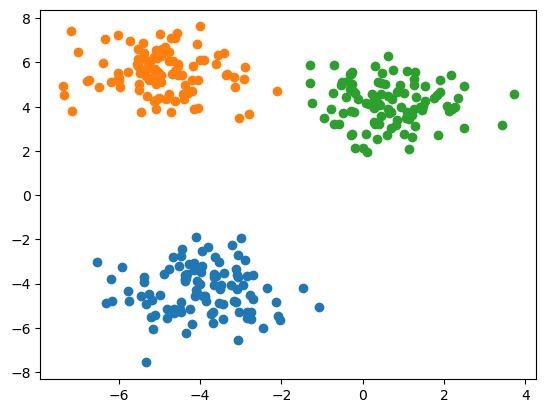

In [5]:
for i in range(3):
    plt.scatter(X[y==i][:, 0], X[y==i][:, 1])
plt.show()

# K-Means

### k를 잘 설정해줘야함. default k = n_samples = 8

c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


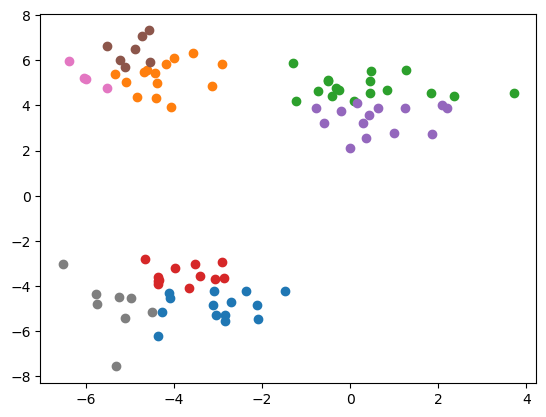

In [6]:
km = KMeans()
km.fit(X_train, y_train)
y_pred=km.predict(X_test)
for i in range(len(np.unique(y_pred))):
    plt.scatter(X_test[y_pred == i][:, 0], X_test[y_pred==i][:, 1])

plt.show()

### 적당한 k 주기

c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


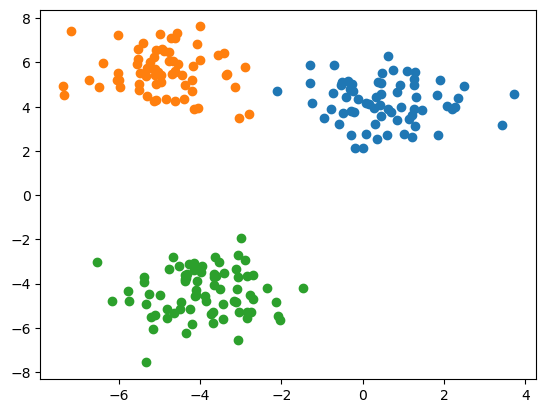

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.7)
km = KMeans(n_clusters=3, max_iter=300)
km.fit(X_train, y_train)
y_pred = km.predict(X_test)

for i in range(3):
    plt.scatter(X_test[y_pred==i][:, 0], X_test[y_pred==i][:, 1])
plt.show()

### k-means의 단점 : 중점이 랜덤이라 기대하는 cluster 생성할 수도 있음

In [99]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [3, 0], [3, 1], [4, 0], [4, 1]])
y = np.array([1, 1, 1, 1, 0, 0, 0, 0])

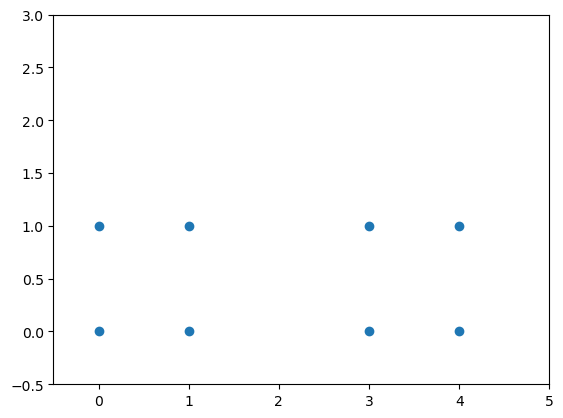

In [100]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-0.5, 5)
plt.ylim(-0.5, 3)
plt.show()

In [101]:
# plt.xlim = (-0.5, 5) 해서 변수로 선언됐었음
# del plt.ylim

c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


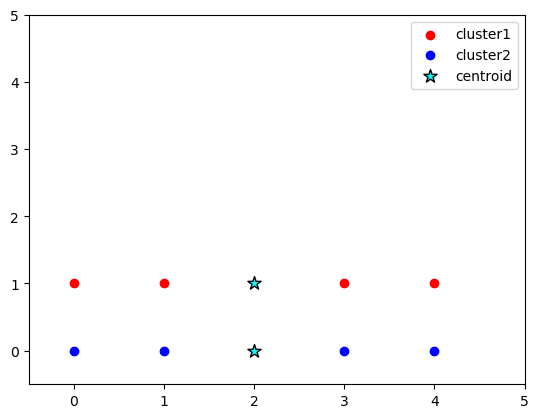

In [103]:
# 원하던 cluster 모양이 아니여 이거 고칠라고 k-means++ 사용함

km=KMeans(n_clusters=2, init='random', random_state=445, n_init=1)
km.fit(X, y)
y_pred=km.predict(X)
centers=km.cluster_centers_
plt.xlim(-0.5, 5)
plt.ylim(-0.5, 5)
plt.scatter(X[y_pred==0][:, 0], X[y_pred==0][:, 1], label='cluster1', color='red')
plt.scatter(X[y_pred==1][:, 0], X[y_pred==1][:, 1], label='cluster2', color='blue')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', label='centroid', color='cyan', edgecolors='black', s=100)
plt.legend()
plt.show()

c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


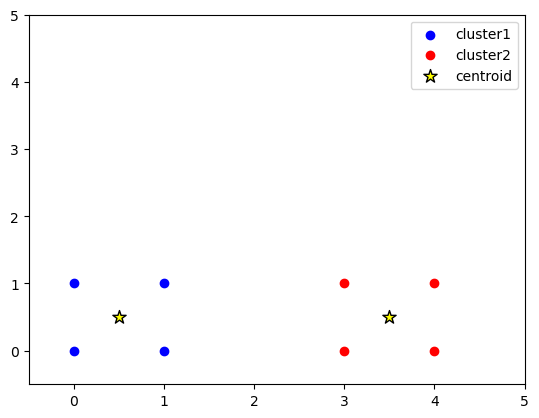

In [104]:
km = KMeans(n_clusters=2, init='k-means++', n_init=1, max_iter=300, random_state=445)
km.fit(X, y)
y_pred=km.predict(X)
centers=km.cluster_centers_
plt.scatter(X[y_pred==0][:, 0], X[y_pred==0][:, 1], color='blue', label='cluster1')
plt.scatter(X[y_pred==1][:, 0], X[y_pred==1][:, 1], color='red', label='cluster2')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', color='yellow', edgecolors='black', label='centroid', s=100)
plt.legend()
plt.xlim(-0.5, 5)
plt.ylim(-0.5, 5)
plt.show()

### k는 알잘딱깔센 못함 -> 정해줘야함

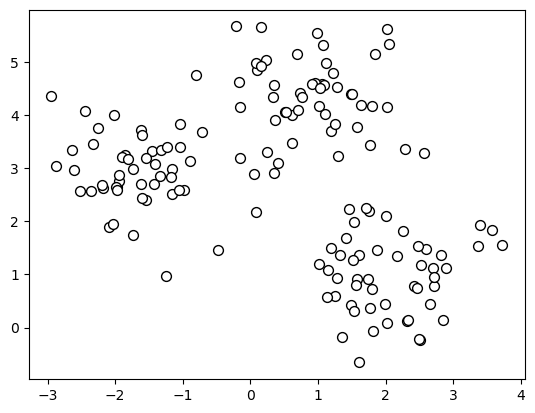

In [4]:
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.7, shuffle=True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], color='white', edgecolor='black', s=50)
plt.show()

In [135]:
km=KMeans(n_clusters=2)

In [136]:
y_km=km.fit_predict(X)
y_km

c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [137]:
print("<Cluster centers>\n", km.cluster_centers_)

<Cluster centers>
 [[-0.40990229  3.65592751]
 [ 2.08306622  1.07671155]]


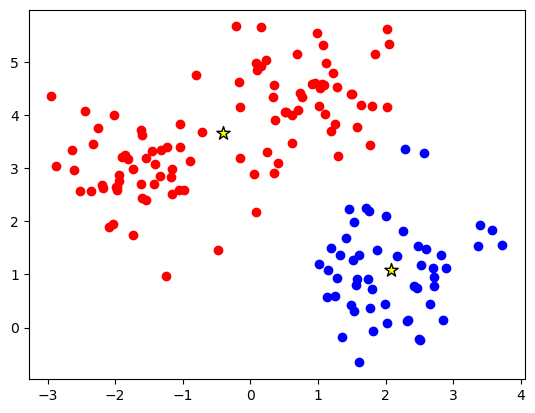

In [138]:
plt.scatter(X[y_km==0][:, 0], X[y_km==0][:, 1], color='red')
plt.scatter(X[y_km==1][:, 0], X[y_km==1][:, 1], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', color='yellow', edgecolors='black', s=100)

plt.show()

In [139]:
km=KMeans(n_clusters=3)

In [140]:
y_km = km.fit_predict(X)

c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


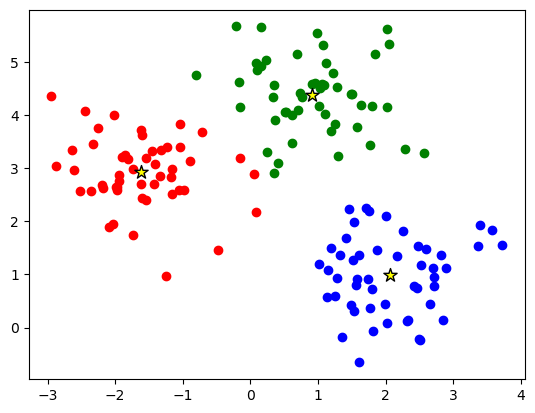

In [141]:
plt.scatter(X[y_km==0][:, 0], X[y_km==0][:, 1], color='red')
plt.scatter(X[y_km==1][:, 0], X[y_km==1][:, 1], color='blue')
plt.scatter(X[y_km==2][:, 0], X[y_km==2][:, 1], color='green')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', color='yellow', edgecolors='black', s=100)

plt.show()

### k 정하기 조금이라도 알잘딱깔센 시키고싶어요 -> distortion, silhouette로 추정

### Distortion
- distortion이 가장 급격하게 변화하는 점 elbow를 구한다.<br>
- Distortion measure(attribute inertia_) = SSE (sum of Square Error)
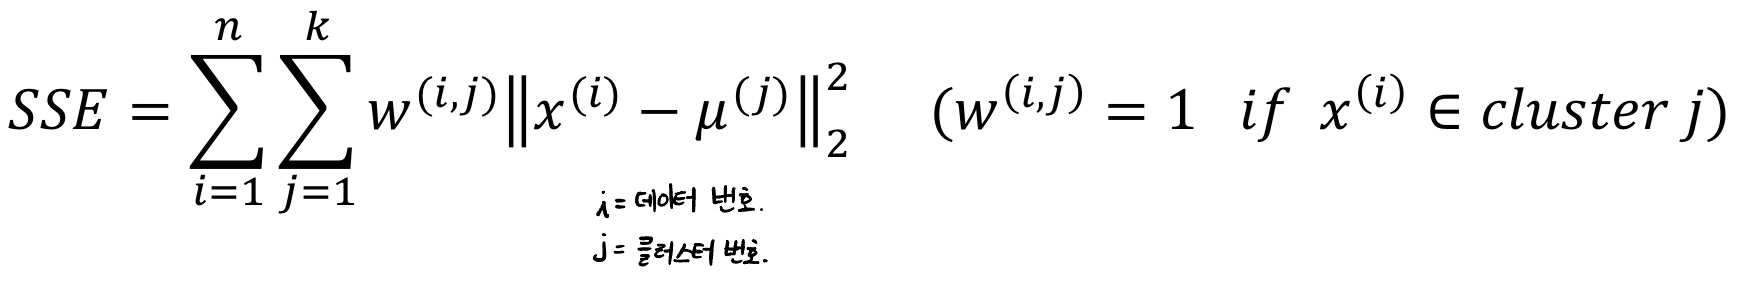

SSE 뭔뜻이냐: 데이터 x⁽ⁱ⁾가 속한 클러스터 j의 중점 μ⁽ʲ⁾와 x⁽ⁱ⁾ 사이의 거리(=벡터 크기)의 합

c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

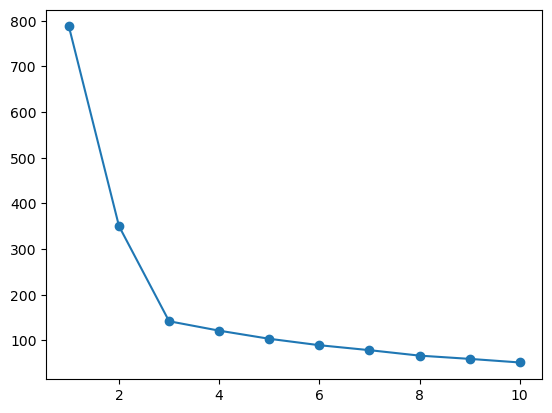

In [6]:
distortions=[]
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.scatter(range(1, 11), distortions)
plt.plot(range(1, 11), distortions)
plt.show()

## Silhouette

- Distortion으로 정확한 k값 찾기 힘들어 k 범위 넓어지면 누가 제일 가파른지 몰러 -> 해결 위해 Silhouette 사용
변수
- cluster cohesion a⁽ⁱ⁾: 같은 클러스터 내의 다른 data와의 거리 평균. 작을수록 좋다
- cluster separation b⁽ⁱ⁾: 다른 클러스터의 data와의 거리 평균. 클수록 좋다
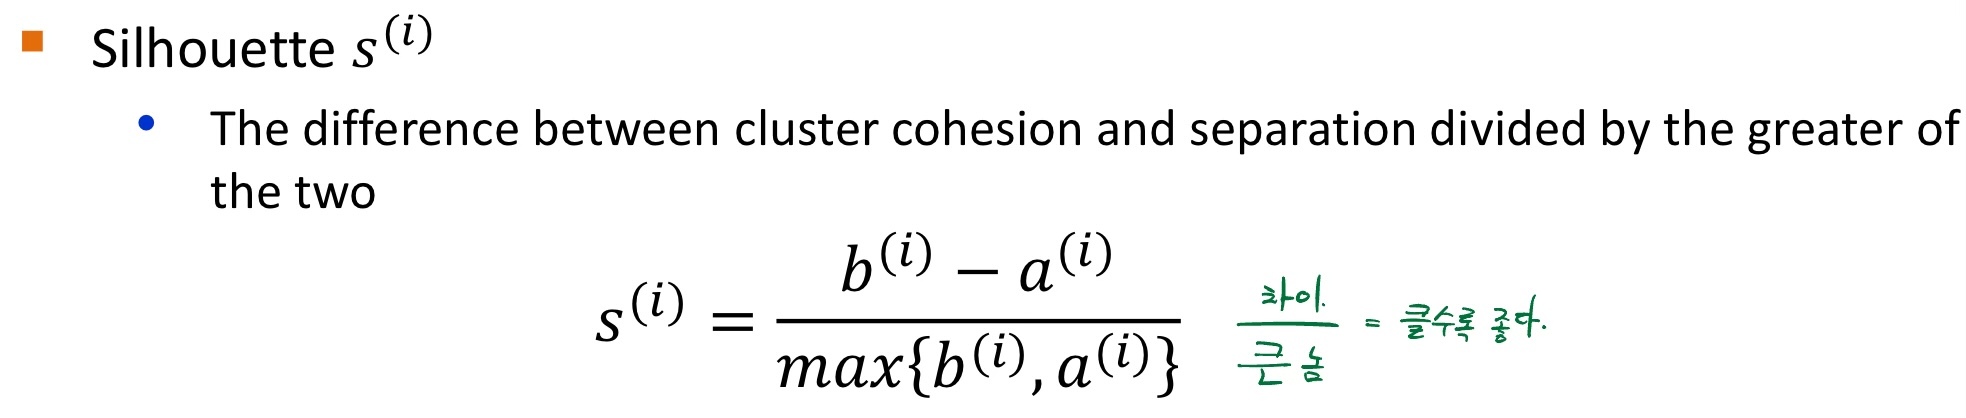

c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hoche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

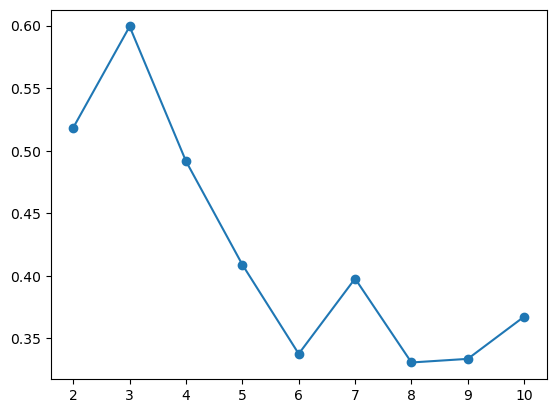

In [8]:
from sklearn.metrics import silhouette_score
silhouette_scores=[]
for i in range(2, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    y_km = km.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_km, metric='euclidean'))

plt.plot(range(2, 11), silhouette_scores)
plt.scatter(range(2, 11), silhouette_scores)

plt.show()

k = 3에서 silhouette가 최대 -> k=3이 최적의 해